In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
def plot_boundaries(model, X, y):
    # Plot the decision boundaries given by the model in argument in additions to points (X,y)
    fig, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(model, X, cmap=plt.cm.coolwarm, alpha=0.8, ax=ax, eps=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('PS')
    ax.set_xlabel('TS')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

def plot_ROC_curve(model, X, y, label=""):
    # Plot the ROC curve of the model prodided in argument given data (X,y)
    y_pred = model.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc = round(roc_auc_score(y, y_pred), 4)
    plt.plot(fpr,tpr,'o-', markersize=3, label=label+", AUC="+str(auc))
    plt.ylabel('TPR')
    plt.xlabel('FPR')

In [4]:
df_train = pd.read_csv("droughts_train.csv")
df_test = pd.read_csv("droughts_test.csv")
features = ['PS', 'TS']

# Separate data into X (features) and y (target)
X_train = df_train[features]
y_train = df_train['Drought']
X_test = df_test[features]
y_test = df_test['Drought']

# Convert data to numpy array
X_train, X_test, y_train, y_test = map(np.array, [X_train, X_test, y_train, y_test])

# Standardize data
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Question (a)

In [35]:
def ModelMaker(X, y, feature_list=[]):
    """all_features = ['RECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS,WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','fips']
    column_indices = [X.index(feature_name) for feature_name in feature_list]
    feature_columns = data_np[:, column_indices]
    PS_column = data_np[:, PS_column_index]
    TS_column = data_np[:, TS_column_index]
    """
    model = LogisticRegression(penalty='l1', C=1, solver='liblinear')

    model.fit(X_train, y_train)

    return model

model_a = ModelMaker(X_train, y_train)

#predict the model on the test set

y_pred = model_a.predict(X_test)
#y_pred_proba = model.predict_proba(X_test)[:,1]

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#print Coefficients
print(f"Coefficients: {model_a.coef_}")


Accuracy: 0.8194174757281554
Coefficients: [[-2.09678618  0.24953926]]


Accuracy: 0.8194174757281554<br>
Coefficients: [[-2.09683709  0.24952416]]<br>
PS has a much larger magnatude therefore it give more information about the likelihood of a drought.

## Question (b)

In [6]:
def KNN_Class(X_train, y_train, X_test, y_test, k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)


    return classifier, accuracy

k* is 17 with accuracy 0.8252427184466019


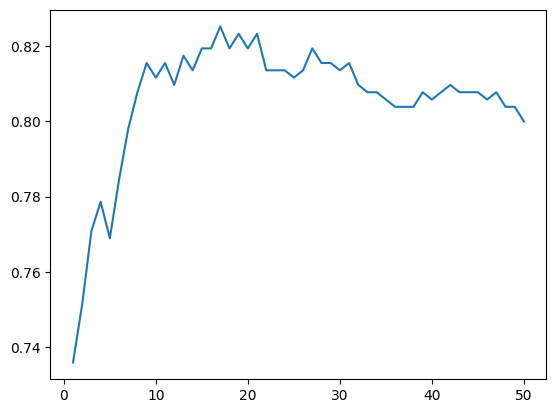

In [7]:
accuracy_list = []
for k in range(1, 51):
    classifier, accuracy = KNN_Class(X_train, y_train, X_test, y_test, k)
    accuracy_list.append(accuracy)
    #print(f"Accuracy for k={k}: {accuracy}")

print(f'k* is {accuracy_list.index(max(accuracy_list)) + 1} with accuracy {max(accuracy_list)}')

plt.plot(range(1, 51), accuracy_list)

## Question (c)

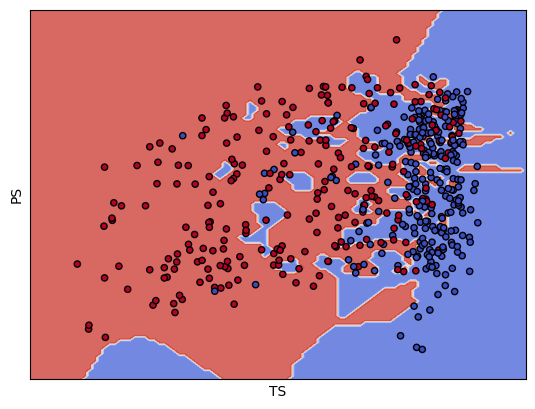

In [8]:
plot_boundaries((KNN_Class(X_train, y_train, X_test, y_test, 1))[0], X_test, y_test)

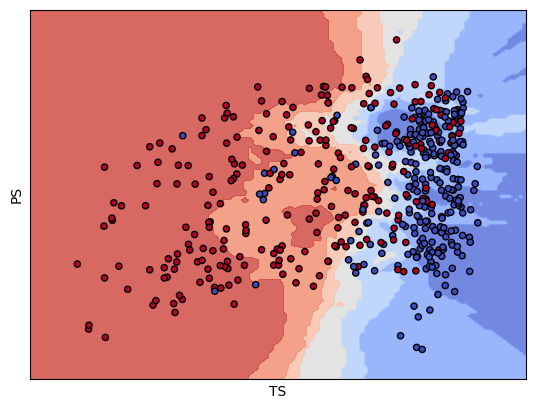

In [9]:
plot_boundaries((KNN_Class(X_train, y_train, X_test, y_test, 17))[0], X_test, y_test)

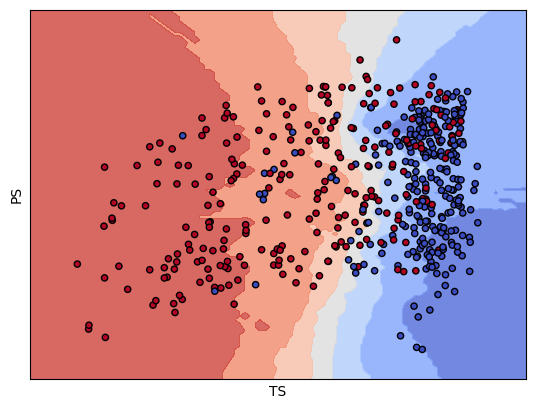

In [10]:
plot_boundaries((KNN_Class(X_train, y_train, X_test, y_test, 50))[0], X_test, y_test)

Largest bias is k = 1. <br>
Largest variance is k = 50

## Question (d)

In [11]:
def DT_Class(X_train, y_train, X_test, y_test, criterion = 'gini', splitter = 'best', max_depth = None, min_samples_leaf = 1): 
    model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    return model, accuracy_test, accuracy_train

In [12]:
model_d, accuracy_test, accuracy_train = DT_Class(X_train, y_train, X_test, y_test)
print(f"Training Accuracy: {accuracy_train}")
print(f"Training Accuracy: {accuracy_test}")

Training Accuracy: 1.0
Training Accuracy: 0.7650485436893204


## Question (e)

In [13]:
params = {
    'max_depth': [1, 3, 5, 10],
    'min_samples_leaf': [1, 5, 20]
}
classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters:, {best_params}")

model_e, accuracy_test, accuracy_train = DT_Class(X_train, y_train, X_test, y_test, max_depth = best_params['max_depth'], min_samples_leaf = best_params['min_samples_leaf'])
print(f"Training Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")


Best Hyperparameters:, {'max_depth': 1, 'min_samples_leaf': 1}
Training Accuracy: 0.8174757281553398
Test Accuracy: 0.8038834951456311


[Text(0.5, 0.75, 'PS <= -0.04\ngini = 0.5\nsamples = 515\nvalue = [262, 253]'),
 Text(0.25, 0.25, 'gini = 0.174\nsamples = 197\nvalue = [19, 178]'),
 Text(0.75, 0.25, 'gini = 0.36\nsamples = 318\nvalue = [243, 75]')]

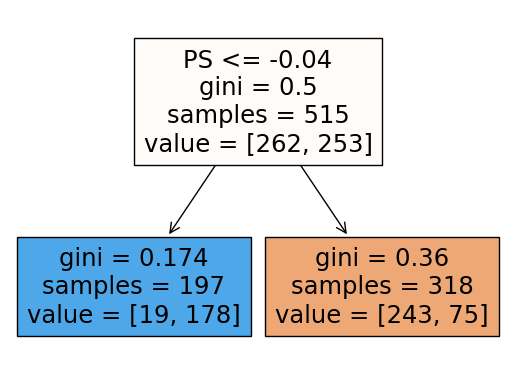

In [14]:
plot_tree(model_e, feature_names=features, filled=True)

[Text(0.42409743366681163, 0.975, 'PS <= -0.04\ngini = 0.5\nsamples = 515\nvalue = [262, 253]'),
 Text(0.09177903436276642, 0.925, 'TS <= -2.782\ngini = 0.174\nsamples = 197\nvalue = [19, 178]'),
 Text(0.07785993910395825, 0.875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1056981296215746, 0.875, 'PS <= -1.16\ngini = 0.167\nsamples = 196\nvalue = [18, 178]'),
 Text(0.02957807742496738, 0.825, 'PS <= -1.386\ngini = 0.024\nsamples = 82\nvalue = [1, 81]'),
 Text(0.0156589821661592, 0.775, 'gini = 0.0\nsamples = 63\nvalue = [0, 63]'),
 Text(0.04349717268377556, 0.775, 'PS <= -1.367\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.02957807742496738, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05741626794258373, 0.725, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.18181818181818182, 0.825, 'TS <= 1.345\ngini = 0.254\nsamples = 114\nvalue = [17, 97]'),
 Text(0.16789908655937363, 0.775, 'TS <= 0.867\ngini = 0.291\nsamples = 96\nvalue = [17, 79]'),
 Text(0.0

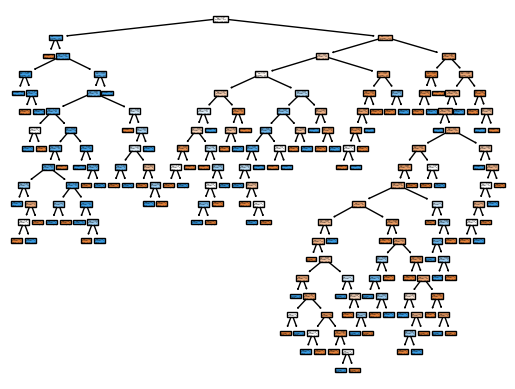

In [15]:
plot_tree(model_d, feature_names=features, filled=True)


## Question (f)

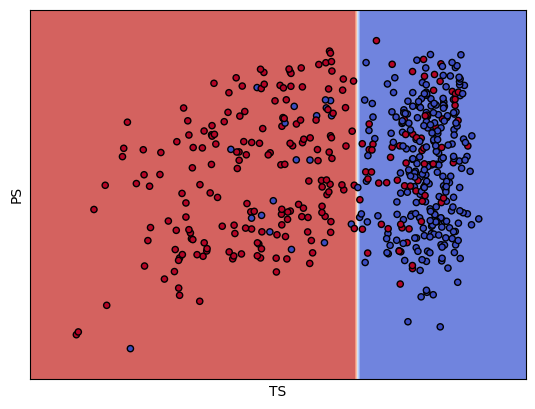

Number of nodes in best model: 3


In [16]:
plot_boundaries(model_e, X_train, y_train)
num_nodes = model_e.tree_.node_count
print(f"Number of nodes in best model: {num_nodes}")

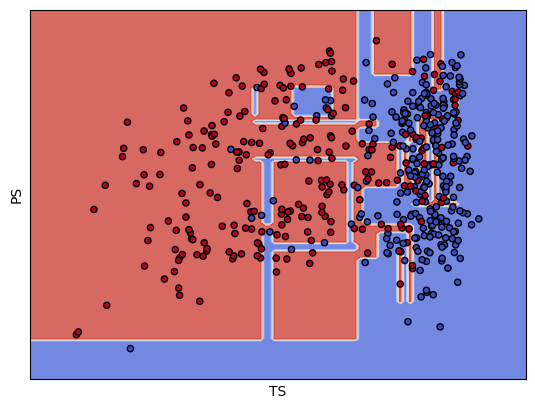

Number of nodes in unconstrained model: 213


In [17]:
plot_boundaries(model_d, X_train, y_train)
num_nodes = model_d.tree_.node_count
print(f"Number of nodes in unconstrained model: {num_nodes}")

The best decision tree has 3 nodes.

The unconstrained decision tree has 213 nodes.

The best decision tree is more interpretable.


## Question (g)

Logistic Regresstion Model


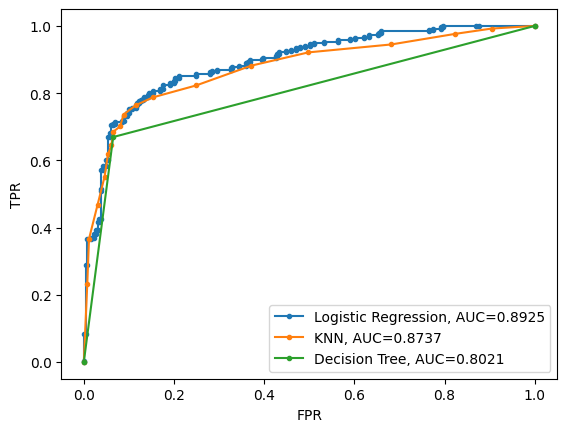

In [23]:
print("Logistic Regresstion Model")
plot_ROC_curve(model_a, X_test, y_test, label="Logistic Regression")
plot_ROC_curve((KNN_Class(X_train, y_train, X_test, y_test, 17))[0], X_test, y_test, label="KNN")
plot_ROC_curve(model_e, X_test, y_test, label="Decision Tree")
#show legend
plt.legend()

In [34]:
y_prob = model_a.predict_proba(X_test)[:, 1]

cutoff_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

desired_tpr = 0.85

best_cutoff = None
best_tpr = 0

for cutoff in cutoff_values:
    y_pred = [1 if prob >= cutoff else 0 for prob in y_prob]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    idx = next(i for i, v in enumerate(tpr) if v >= desired_tpr)
    current_cutoff = thresholds[idx]
    current_tpr = tpr[idx]
    if current_tpr > best_tpr:
        best_tpr = current_tpr
        best_cutoff = current_cutoff

print("Best Cutoff:", best_cutoff)
print("Best True Positive Rate:", best_tpr)

Best Cutoff: 0.3196740661656586
Best True Positive Rate: 0.8503937007874016


I would recommend use of either the Logistic Regression model or the K-Nearest Neighbor's model.  Due to the Logistic regression having a higher AUC, I would recommend it to be used with a threshold of 0.32.